In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import giapy

from giapy.numTools.solvde import solvde
from giapy.earth_tools.elasticlove import *

prem = giapy.earth_tools.earthParams.EarthParams()

In [3]:
reload(giapy)
reload(giapy.earth_tools)
reload(giapy.earth_tools.elasticlove)
from giapy.earth_tools.elasticlove import *
%run ../giapy/earth_tools/viscouslove.py

In [4]:
%run ../giapy/earth_tools/viscouslove.py

In [5]:
Nz = 300
zarray_smalln = (np.log10(np.linspace(1., 10**0.1, Nz))*(1-prem.rCore)/0.1 + prem.rCore)*prem.norms['r']
zarray_largen = (np.log10(np.linspace(1., 10**2, Nz))*(1-prem.rCore)/2 + prem.rCore)*prem.norms['r']
n = 2

In [6]:
difeqVisc = SphericalViscSMat(n, zarray_smalln, prem, Q=1)
indexv = np.array([2,3,0,1])
scalvVisc = np.array([1e-12, 1e-12, 1e+02, 1e+01])
slowc = 1
start = (scalvVisc*np.ones((4, len(zarray_smalln))).T).T
yV = solvde(500, 1e-14, slowc, scalvVisc, indexv, 2,
                            start, difeqVisc, True, True)

/media/skachuck/winlin/SamDocuments/work/pgr/giapy/giapy/numTools/solvde.py:198: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.c[irow-1, j+jcoff, k] = s[i, j]


Iter.
Error      FAC        
0       
9.702862   0.103062   
Iter.
Error      FAC        
1       
8.702862   0.114905   
Iter.
Error      FAC        
2       
7.702862   0.129822   
Iter.
Error      FAC        
3       
6.702862   0.149190   
Iter.
Error      FAC        
4       
5.702862   0.175351   
Iter.
Error      FAC        
5       
4.702862   0.212636   
Iter.
Error      FAC        
6       
3.702862   0.270061   
Iter.
Error      FAC        
7       
2.702862   0.369978   
Iter.
Error      FAC        
8       
1.702862   0.587246   
Iter.
Error      FAC        
9       
0.702862   1.000000   
Iter.
Error      FAC        
10      
0.000000   1.000000   


In [7]:
s = np.s_[1:-1]
foo = (yV[0,2:] - yV[0,:-2])/(zarray_smalln[2:] - zarray_smalln[:-2])
np.mean(2*yV[0][s]/zarray_smalln[s] + foo - n*(n+1)*yV[1][s]/zarray_smalln[s])

-1.1416216582342839e-24

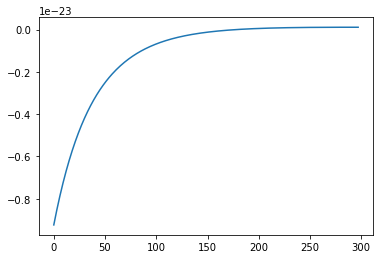

In [8]:
plt.plot(2*yV[0][s]/zarray_smalln[s] + foo - n*(n+1)*yV[1][s]/zarray_smalln[s])

In [9]:
difeqElas = SphericalElasSMat(n, zarray_smalln, prem, Q=1)
indexv = np.array([3,4,0,1,5,2])
scalvElas = np.array([1e-02, 1e-02, 1e+02, 1e+01, 1e+01, 1e-07])
slowc = 1
start = (scalvElas*np.ones((6, len(zarray_smalln))).T).T
yE = solvde(500, 1e-10, slowc, scalvElas, indexv, 3,
                            start, difeqElas, True, True)

start = (scalvElas*np.ones((6, len(zarray_smalln))).T).T
yE2 = solvde(500, 1e-10, slowc, scalvElas, indexv, 3, start, 
             SphericalElasSMat(n, zarray_smalln, prem, Q=2),
             True, True)

Iter.
Error      FAC        
0       
3.788904   0.263929   
Iter.
Error      FAC        
1       
2.788904   0.358564   
Iter.
Error      FAC        
2       
1.788904   0.559001   
Iter.
Error      FAC        
3       
0.788904   1.000000   
Iter.
Error      FAC        
4       
0.000000   1.000000   
Iter.
Error      FAC        
0       
3.788820   0.263934   
Iter.
Error      FAC        
1       
2.788820   0.358575   
Iter.
Error      FAC        
2       
1.788820   0.559028   
Iter.
Error      FAC        
3       
0.788820   1.000000   
Iter.
Error      FAC        
4       
0.000000   1.000000   


In [10]:
b = gen_viscb(n, yE.y, np.zeros_like(zarray_smalln), 
              prem, 0.5*(zarray_smalln[1:] + zarray_smalln[:-1]), Q=1)

In [11]:
difeqVisc = SphericalViscSMat(n, zarray_smalln, 
                                       prem, Q=1, b=b)
indexv = np.array([2,3,0,1])
scalvVisc = np.array([1e-12, 1e-12, 1e+02, 1e+01])
slowc = 0.5
start = (scalvVisc*np.ones((4, len(zarray_smalln))).T).T
yVb = solvde(500, 1e-14, slowc, scalvVisc, indexv, 2,
                            start, difeqVisc, True, True)

Iter.
Error      FAC        
0       
3.012734   0.165962   
Iter.
Error      FAC        
1       
2.512734   0.198986   
Iter.
Error      FAC        
2       
2.012734   0.248418   
Iter.
Error      FAC        
3       
1.512734   0.330527   
Iter.
Error      FAC        
4       
1.012734   0.493713   
Iter.
Error      FAC        
5       
0.512734   0.975164   
Iter.
Error      FAC        
6       
0.012734   1.000000   
Iter.
Error      FAC        
7       
0.000000   1.000000   


In [12]:
paramCore = prem.getParams(prem.rCore)
rhoC = paramCore['den']
gC = paramCore['grav']
denC = prem.denCore

re = prem.norms['r']
paramSurf = prem.getParams(1.)
g0 = paramSurf['grav']
rhobar = g0/prem.G/re

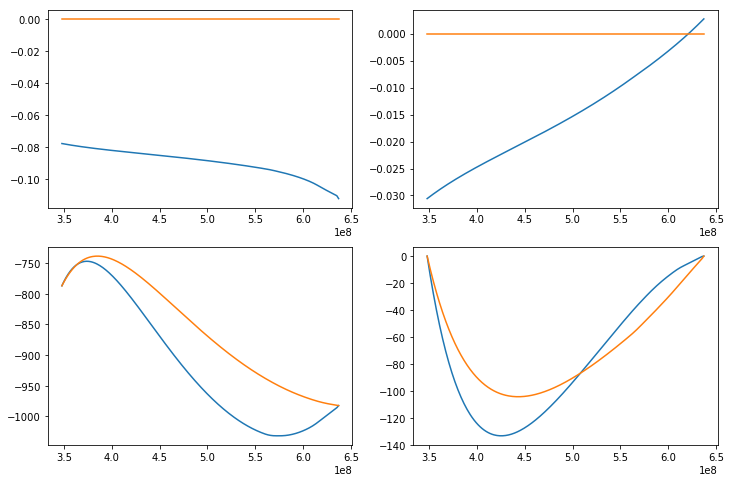

In [13]:
i=2
#i += 1
#if i > 3: i=0
#print i
fig, axs = plt.subplots(2,2, figsize=(12,8))
for i, ax in enumerate(axs.flatten()):
    #ax.plot(zarray_smalln, yV[i]);
    ax.plot(zarray_smalln, yE[i]);
    ax.plot(zarray_smalln, yVb[i]);

In [14]:
yE0, yV0 = giapy.earth_tools.earthIntegrator.get_t0_guess(prem, (zarray_smalln/re))

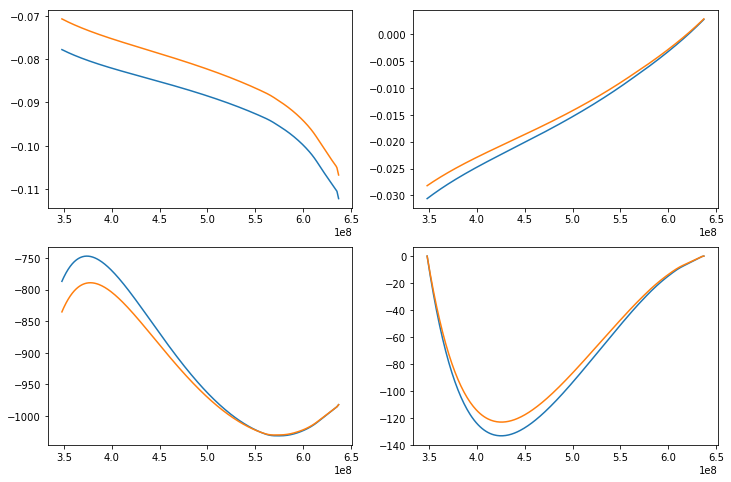

In [15]:
i=2
#i += 1
#if i > 3: i=0
#print i
fig, axs = plt.subplots(2,2, figsize=(12,8))
norms = [g0/ (prem.norms['mu']/prem.norms['r']), g0/ (prem.norms['mu']/prem.norms['r']), g0, g0]
for i, ax in enumerate(axs.flatten()):
    #ax.plot(zarray_smalln, yV[i]);
    ax.plot(zarray_smalln, yE[i])
    ax.plot(zarray_smalln, yE0[i]*norms[i]);

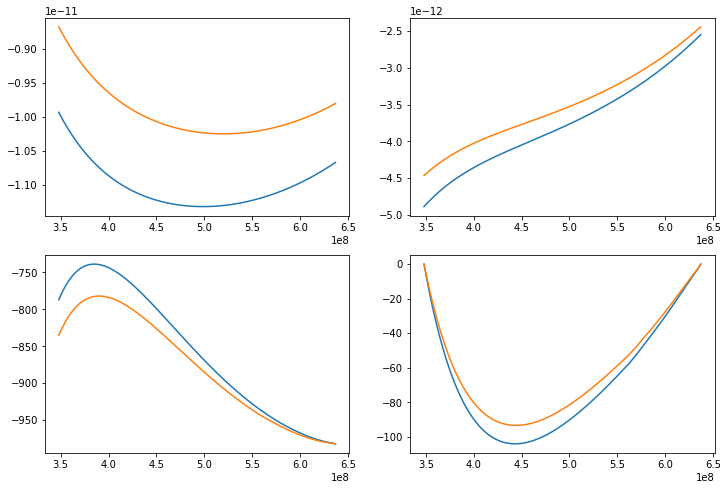

In [16]:
norms0 = [g0/ (prem.norms['eta']/prem.norms['r']), g0/ (prem.norms['eta']/prem.norms['r']), g0, g0]

fig, axs = plt.subplots(2,2, figsize=(12,8))
for i, ax in enumerate(axs.flatten()):
    #ax.plot(zarray_smalln, yV[i]);
    ax.plot(zarray_smalln, yVb[i])
    ax.plot(zarray_smalln, yV0[i]*norms0[i]);

In [17]:
%run ../giapy/earth_tools/viscouslove.py

In [18]:
zarray_smalln_norm = (np.log10(np.linspace(1., 10**0.1, Nz))*(1-prem.rCore)/0.1 + prem.rCore)
zarray_largen_norm = (np.log10(np.linspace(1., 10**10, Nz))*(1-prem.rCore)/10 + prem.rCore)

difeqVisc = SphericalViscSMat_norm(n, (zarray_smalln/re), prem, Q=1)
indexv = np.array([2,3,0,1])
scalvVisc = np.array([1, 1, 1, 1])
slowc = 1
start = np.ones((4, len(zarray_smalln_norm)))
yVn = solvde(500, 1e-14, slowc, scalvVisc, indexv, 2,
                            start, difeqVisc, True, True)

Iter.
Error      FAC        
0       
1.761118   0.567821   
Iter.
Error      FAC        
1       
0.761118   1.000000   
Iter.
Error      FAC        
2       
0.000000   1.000000   


In [19]:
s = np.s_[1:-1]
foo = (yVn[0,2:] - yVn[0,:-2])/((zarray_smalln/re)[2:] - (zarray_smalln/re)[:-2])
np.mean(2*yVn[0][s]/(zarray_smalln/re)[s] + foo - (n+1)*yVn[1][s]/(zarray_smalln/re)[s])

-0.00011622871232709115

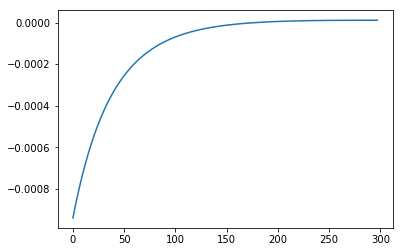

In [20]:
plt.plot(2.*yVn[0][s]/(zarray_smalln/re)[s] + foo - (n+1)*yVn[1][s]/(zarray_smalln/re)[s])

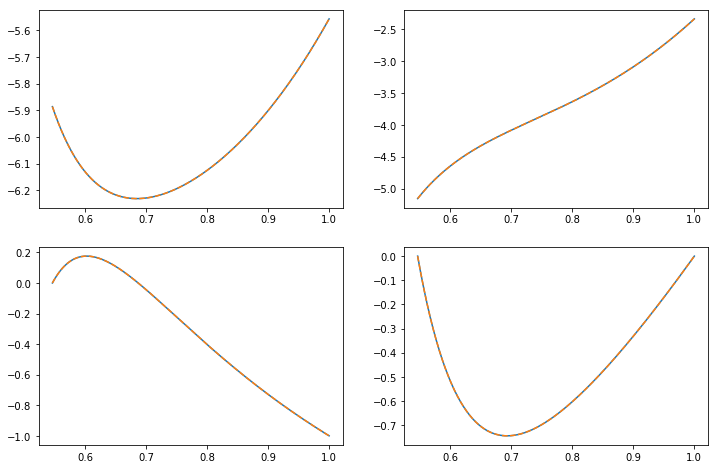

In [21]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
norms = [2*prem.norms['eta']*(2*n+1)/(g0*re), 2*n*prem.norms['eta']*(2*n+1)/(g0*re), 1/g0, n/g0]

for i, ax in enumerate(axs.flatten()):
    ax.plot(zarray_smalln_norm, yVn[i]);
    #ax1 = ax.twinx();
    ax.plot(zarray_smalln_norm, yV[i]*norms[i], ls='--')

In [22]:
difeqElas_norm = SphericalElasSMat_norm(n, zarray_smalln_norm, prem, Q=1)
indexv = np.array([3,4,0,1,5,2])
scalvElas = np.array([1, 1, 1, 1, 1, 1])
slowc = 1
start = (scalvElas*np.ones((6, len(zarray_smalln_norm))).T).T
yEn = solvde(500, 1e-14, slowc, scalvElas, indexv, 3,
                            start, difeqElas_norm, True, False, True)
start = (scalvElas*np.ones((6, len(zarray_smalln_norm))).T).T
yEn2 = solvde(500, 1e-12, slowc, scalvElas, indexv, 3, start, 
              SphericalElasSMat_norm(n, zarray_smalln_norm, prem, Q=2), 
              True)

Iter.
Error      FAC        
0       
1.475585   0.677697   
Iter.
Error      FAC        
1       
0.475585   1.000000   
Iter.
Error      FAC        
2       
0.000000   1.000000   
Iter.
Error      FAC        
0       
1.592014   0.628135   
Iter.
Error      FAC        
1       
0.592014   1.000000   
Iter.
Error      FAC        
2       
0.000000   1.000000   


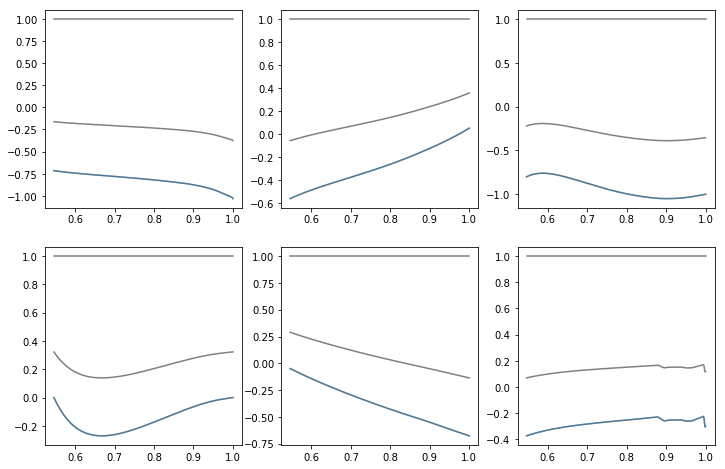

In [23]:
fig, axs = plt.subplots(2,3, figsize=(12,8))

norms = [(2*n+1)*rhobar, n*(2*n+1)*rhobar, 1/g0, n/g0, 
         (2*n+1)*rhobar/g0, 1/prem.G]

for i, ax in enumerate(axs.flatten()):
    for foo in yEn.steps:
        ax.plot(zarray_smalln_norm, foo[i], color='k', alpha=.5)
    ax.plot(zarray_smalln_norm, yE[i]*norms[i], ls='-', alpha=0.5)

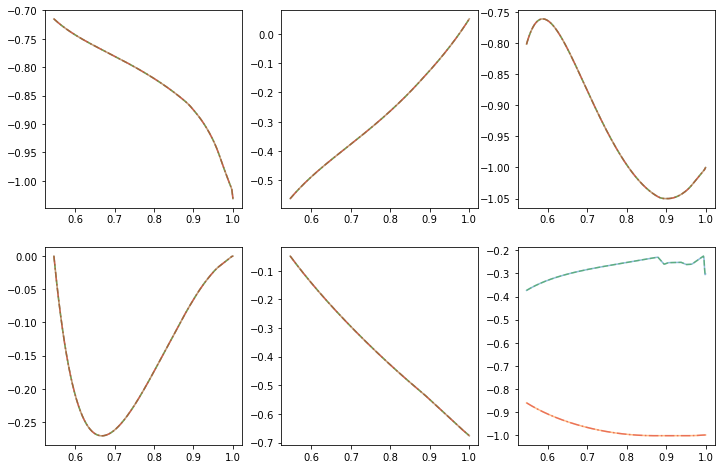

In [24]:
fig, axs = plt.subplots(2,3, figsize=(12,8))
norms = [(2*n+1)*rhobar, n*(2*n+1)*rhobar, 1/g0, n/g0, 
         (2*n+1)*rhobar/g0, 1/prem.G]

for i, ax in enumerate(axs.flatten()):
    ax.plot(zarray_smalln_norm, yEn[i], alpha=0.5);
    ax.plot(zarray_smalln_norm, yEn2[i], alpha=0.5)
    #ax1 = ax.twinx();
    ax.plot(zarray_smalln_norm, yE[i]*norms[i], ls='--', alpha=0.5)
    ax.plot(zarray_smalln_norm, yE2[i]*norms[i], ls='-.', alpha=0.5)

In [25]:
rhoSurf = prem(1.)['den']/rhobar

In [26]:

zmid = 0.5*(zarray_smalln_norm[1:] + zarray_smalln_norm[:-1])
uV = np.zeros_like(zarray_smalln_norm)

bn = gen_viscb_norm(n, yEn.y, uV, prem, zmid)

In [27]:
difeqVisc = SphericalViscSMat_norm(n, zarray_smalln_norm, 
                                       prem, Q=1, b=bn)
indexv = np.array([2,3,0,1])
scalvVisc = np.array([1, 1, 1, 1])
slowc = 1
start = (scalvVisc*np.ones((4, len(zarray_smalln_norm))).T).T
yVnb = solvde(500, 1e-10, slowc, scalvVisc, indexv, 2,
                            start, difeqVisc, True, True)

Iter.
Error      FAC        
0       
0.695237   1.000000   
Iter.
Error      FAC        
1       
0.000000   1.000000   


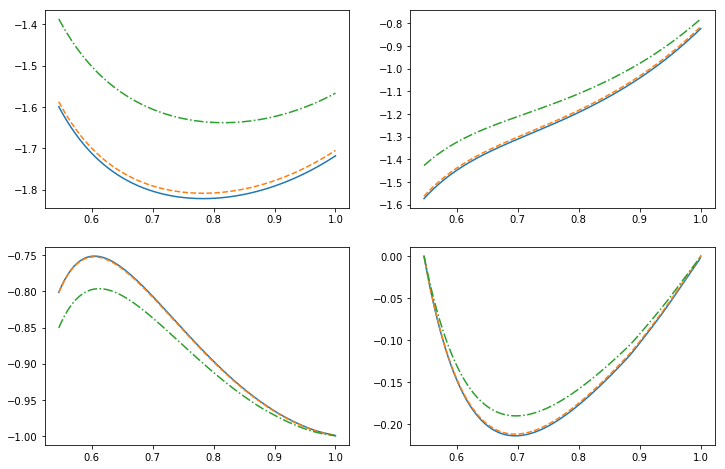

In [28]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
norms = [2*prem.norms['eta']*(2*n+1)/(g0*re), 2*n*prem.norms['eta']*(2*n+1)/(g0*re), 1/g0, n/g0]
norms0 = [g0/ (prem.norms['eta']/prem.norms['r']), g0/ (prem.norms['eta']/prem.norms['r']), g0, g0]

for i, ax in enumerate(axs.flatten()):
    ax.plot(zarray_smalln_norm, yVnb[i]);
    #ax1 = ax.twinx();
    ax.plot(zarray_smalln_norm, yVb[i]*norms[i], ls='--')
    ax.plot(zarray_smalln_norm, yV0[i]*norms0[i]*norms[i], ls='-.')

In [30]:
%run ../giapy/earth_tools/viscouslove.py

In [32]:
%run ../giapy/earth_tools/viscellove.py

In [33]:
tau = 2*prem.norms['eta']/(rhobar*g0*re) / np.pi/1e10
times = np.r_[0, np.logspace(-3, 3)]/tau
out = SphericalEarthOutput(times, zs=zarray_smalln_norm, zsave=zarray_smalln_norm)
f = SphericalLoveVelocities(prem, zarray_smalln_norm, 2)

In [34]:
integrateRelaxationScipy(f, out)

/home/skachuck/anaconda2/lib/python2.7/site-packages/scipy/integrate/_ode.py:869: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  'Unexpected istate=%s' % istate))


IndexError: SphericalEarthOutput received a time t=1753.243 that was not in its output times.

In [36]:
out.outArray.shape

(51, 300, 9)

In [37]:
out.outArray[:,-1,0]+out.outArray[:,-1,1]

array([-1.03109505, -1.03191955, -1.03292909, -1.02731233, -1.02908415,
       -1.03143063, -1.03453708, -1.03864778, -1.03719241, -1.04437626,
       -1.03535842, -1.04785937, -1.06430827, -1.06784886, -1.09609905,
       -1.09545627, -1.14314349, -1.16895689, -1.21338726, -1.24429225,
       -1.30574739, -1.3993153 , -1.52496371, -1.64149817, -1.79281004,
       -1.932853  , -2.08416196, -2.25399038, -2.41156855, -2.57991227,
       -2.75094225, -2.93644121, -3.11276774, -3.27095297, -3.39396501,
       -3.47508341, -3.51771273, -3.53452522, -3.53907275, -3.53981825,
       -3.5398822 , -3.53988458, -3.53988461, -3.53988461, -3.53988461,
       -3.53988461, -3.53988461, -3.53988461, -3.53988461, -3.53988461,  0.        ])

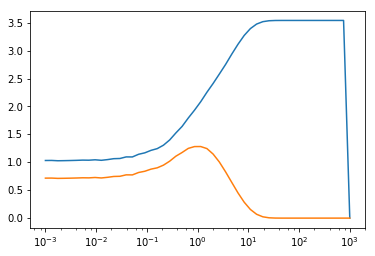

In [38]:
plt.semilogx(times*tau, -(out.outArray[:,-1,0]+out.outArray[:,-1,1]))
plt.semilogx(times*tau, -(out.outArray[:,0,0]+out.outArray[:,0,1]))

In [39]:
out.outArray[:,-1,-1]

array([ -1.00000000e+00,  -9.98497977e-01,  -9.98497977e-01,
        -9.93910603e-01,  -9.93910603e-01,  -9.93910603e-01,
        -9.93910603e-01,  -9.93910603e-01,  -9.89360897e-01,
        -9.89360897e-01,  -9.77128847e-01,  -9.77128847e-01,
        -9.77128847e-01,  -9.65167952e-01,  -9.65167952e-01,
        -9.40263625e-01,  -9.40263625e-01,  -9.16523306e-01,
        -8.93884858e-01,  -8.48230165e-01,  -8.06950073e-01,
        -7.69555864e-01,  -7.35614863e-01,  -6.76602288e-01,
        -6.27340870e-01,  -5.58214087e-01,  -4.91773131e-01,
        -4.42094845e-01,  -3.78865173e-01,  -3.21423598e-01,
        -2.53155984e-01,  -1.98611767e-01,  -1.38185099e-01,
        -8.74989418e-02,  -4.70115667e-02,  -2.03769578e-02,
        -6.02639225e-03,  -3.92673603e-04,   1.08934459e-03,
         1.33265900e-03,   1.35393287e-03,   1.35471082e-03,
         1.35472027e-03,   1.35472031e-03,   1.35472030e-03,
         1.35472030e-03,   1.35472029e-03,   1.35472030e-03,
         1.35472029e-03,

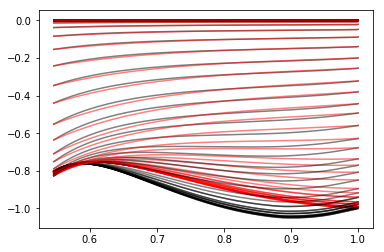

In [40]:
for line in out.outArray[:,:,[-2,-1]]:
    plt.plot(zarray_smalln_norm, line[:,0], c='k', alpha=0.5)
    plt.plot(zarray_smalln_norm, line[:,1], c='r', alpha=0.5)

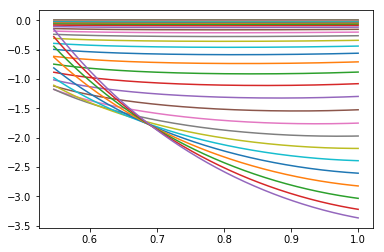

In [44]:
for line in out.outArray[:35,:,1]:
    plt.plot(zarray_smalln_norm, line)

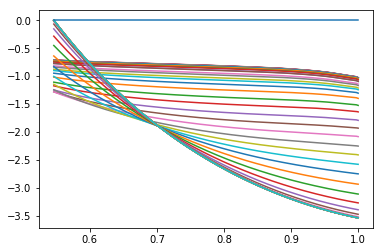

In [42]:
for line in out.outArray[:,:,[0,1]]:
    plt.plot(zarray_smalln_norm, line[:,0]+line[:,1])

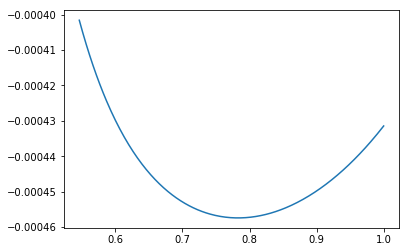

In [61]:
#i = 0
i+=1
plt.plot(zarray_smalln_norm, out.outArray[i,:,1])

In [126]:
times

array([  0.00000000e+00,   1.80693012e-06,   2.39546779e-06,
         3.17569888e-06,   4.21006010e-06,   5.58132452e-06,
         7.39922536e-06,   9.80923715e-06,   1.30042172e-05,
         1.72398385e-05,   2.28550499e-05,   3.02991994e-05,
         4.01679930e-05,   5.32511648e-05,   7.05956744e-05,
         9.35894879e-05,   1.24072648e-04,   1.64484519e-04,
         2.18058997e-04,   2.89083290e-04,   3.83241004e-04,
         5.08066954e-04,   6.73550136e-04,   8.92933071e-04,
         1.18377152e-03,   1.56933936e-03,   2.08049102e-03,
         2.75813060e-03,   3.65648508e-03,   4.84744383e-03,
         6.42631138e-03,   8.51943403e-03,   1.12943105e-02,
         1.49729958e-02,   1.98498707e-02,   2.63151993e-02,
         3.48863587e-02,   4.62492423e-02,   6.13131462e-02,
         8.12835347e-02,   1.07758506e-01,   1.42856676e-01,
         1.89386719e-01,   2.51072126e-01,   3.32849171e-01,
         4.41261929e-01,   5.84985954e-01,   7.75522528e-01,
         1.02811903e+00,

553.42483378206646

In [33]:
def exp_pt_density(nz, delta=1., x0=0., x1=1., normed_delta=True):
    """Generate a point distribution with exponential spacing.

    Parameters
    ----------
    nz : integer - number of points to generate
    delta : float
        The exponential rate of increase (decrease if negative) of point 
        density. It is assumed to be normalized to the distance x1-x0 unless
        normed_delta=False. (Default 1.)
    x0, x1 : the range over which to distribute points (Defaults 0 to 1)
    """
    qs = np.arange(nz, dtype=float)
    if normed_delta:
        xs = (x1-x0)*delta * np.log(qs/(nz-1)*(np.exp(1./delta) - 1) + 1) + x0
    else:
        xs = x1* np.log(qs/(nz-1)*(np.exp((x1-x0)/delta) - 1) + 1) + x0
    return xs

In [34]:
n = 2

zarray = exp_pt_density(Nz, np.log(n)/(n+.5), prem.rCore, 1.)

difeqVisc = SphericalViscSMat_norm(n, zarray, prem, Q=1)
indexv = np.array([2,3,0,1])
scalvVisc = np.array([1, 1, 1, 1])
slowc = 1
start = (scalvVisc*np.ones((4, len(zarray))).T).T
yE2nexp = solvde(500, 1e-10, slowc, scalvVisc, indexv, 2,
                            start, difeqVisc, True, True)

Iter.
Error      FAC        
0       
1.722954   0.580399   
Iter.
Error      FAC        
1       
0.722954   1.000000   
Iter.
Error      FAC        
2       
0.000000   1.000000   


In [35]:
qs = exp_pt_density(100, 0.1)

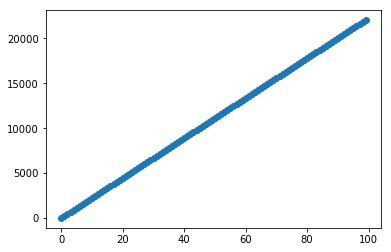

In [36]:
plt.plot(np.exp(qs/0.1), marker='o')

In [37]:
difeqVisc.A.shape

(299, 4, 4)

In [38]:
difeqVisc.smatrix(0, 0, 100, 8, is1, isf, indexv, s, y)

NameError: name 'is1' is not defined